# Exercise 1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

filenames = ["data1.tsv", "data2.tsv", "data3.tsv", "data4.tsv"]

for filename in filenames:
    print("\n{}".format(filename))
    df = pd.read_csv(filename, sep="\t").values
    print("x-values: {:4.2f}".format(np.mean(df[:,0])))
    print("y-values: {:4.2f}".format(np.mean(df[:,1])))


data1.tsv
x-values: 8.90
y-values: 7.45

data2.tsv
x-values: 8.90
y-values: 7.34

data3.tsv
x-values: 8.90
y-values: 7.50

data4.tsv
x-values: 9.10
y-values: 7.59


## Printing variance

In [158]:
for filename in filenames:
    print("\n{}".format(filename))
    df = pd.read_csv(filename, sep="\t").values
    print("Variance, x: {:4.3f}".format(np.var(df[:,0])))
    print("Variance, y: {:4.3f}".format(np.var(df[:,1])))


data1.tsv
Variance, x: 10.890
Variance, y: 4.095

data2.tsv
Variance, x: 10.890
Variance, y: 3.832

data3.tsv
Variance, x: 10.890
Variance, y: 4.122

data4.tsv
Variance, x: 10.890
Variance, y: 4.030


## Printing Pearson

In [3]:
for filename in filenames:
    print("\n{}".format(filename))
    df = pd.read_csv(filename, sep="\t").values
    print(np.corrcoef(df[:,0], df[:,1])[0,1])


data1.tsv
0.8148501351827999

data2.tsv
0.8234831705499976

data3.tsv
0.8210732452308599

data4.tsv
0.8147875449181253


In [159]:
from scipy import stats
for filename in filenames:
    print("\n{}".format(filename))
    df = pd.read_csv(filename, sep="\t").values
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[:,0], df[:,1])
    print("{:3.4f}x + {:3.4f}".format(slope, intercept))


data1.tsv
0.4997x + 2.9997

data2.tsv
0.4885x + 2.9894

data3.tsv
0.5052x + 3.0079

data4.tsv
0.4957x + 3.0825


## Plot the four graphs


data1.tsv

data2.tsv

data3.tsv

data4.tsv


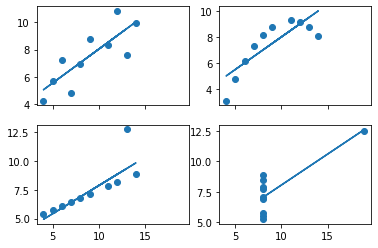

In [160]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True)
for filename, axis in zip(filenames, ax.flat):
    print("\n{}".format(filename))
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[:,0], df[:,1])
    df = pd.read_csv(filename, sep="\t").values
    axis.scatter(df[:,0], df[:,1])
    axis.plot(df[:,0],slope*df[:,0]+intercept)

Point: Even though the graphs have (virtually) the same values, they look very different in reality.

# Working with the dataset

In [66]:
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
crime_df = df
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


### Weekly

<Figure size 432x288 with 0 Axes>

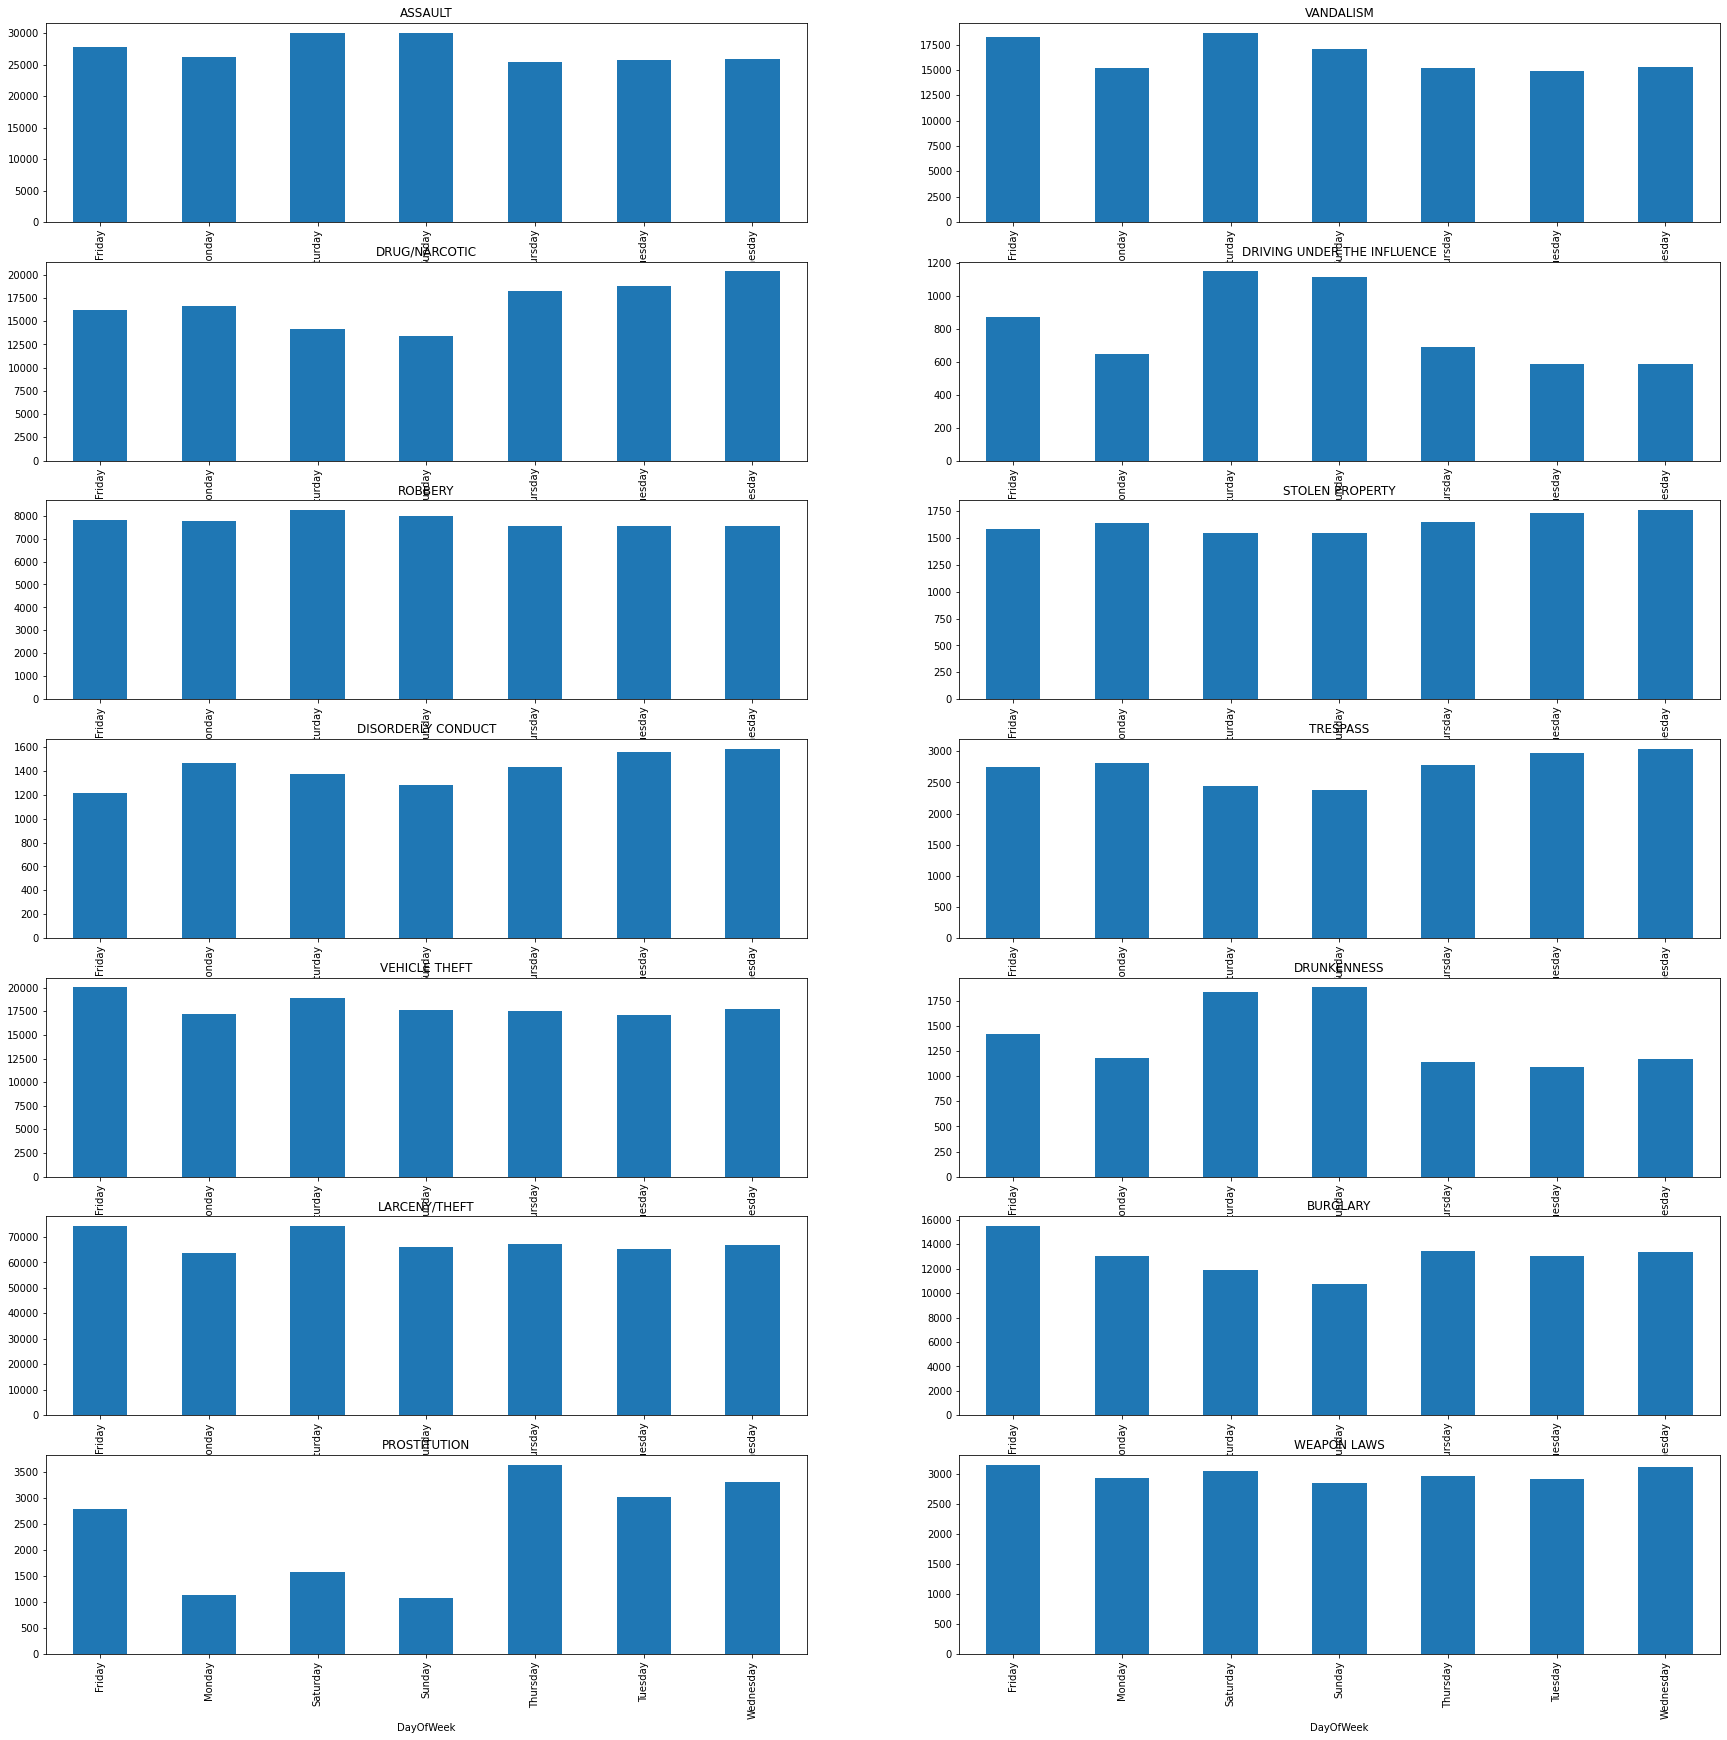

In [70]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
plt.subplots_adjust(wspace=2, hspace=10)
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
df['Date'] = pd.to_datetime(df['Date'])

for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(df.DayOfWeek).agg('count').plot(kind='bar', ax=ax, title=crime)
    
plt.show()

### Monthly

AttributeError: 'numpy.ndarray' object has no attribute 'Date'

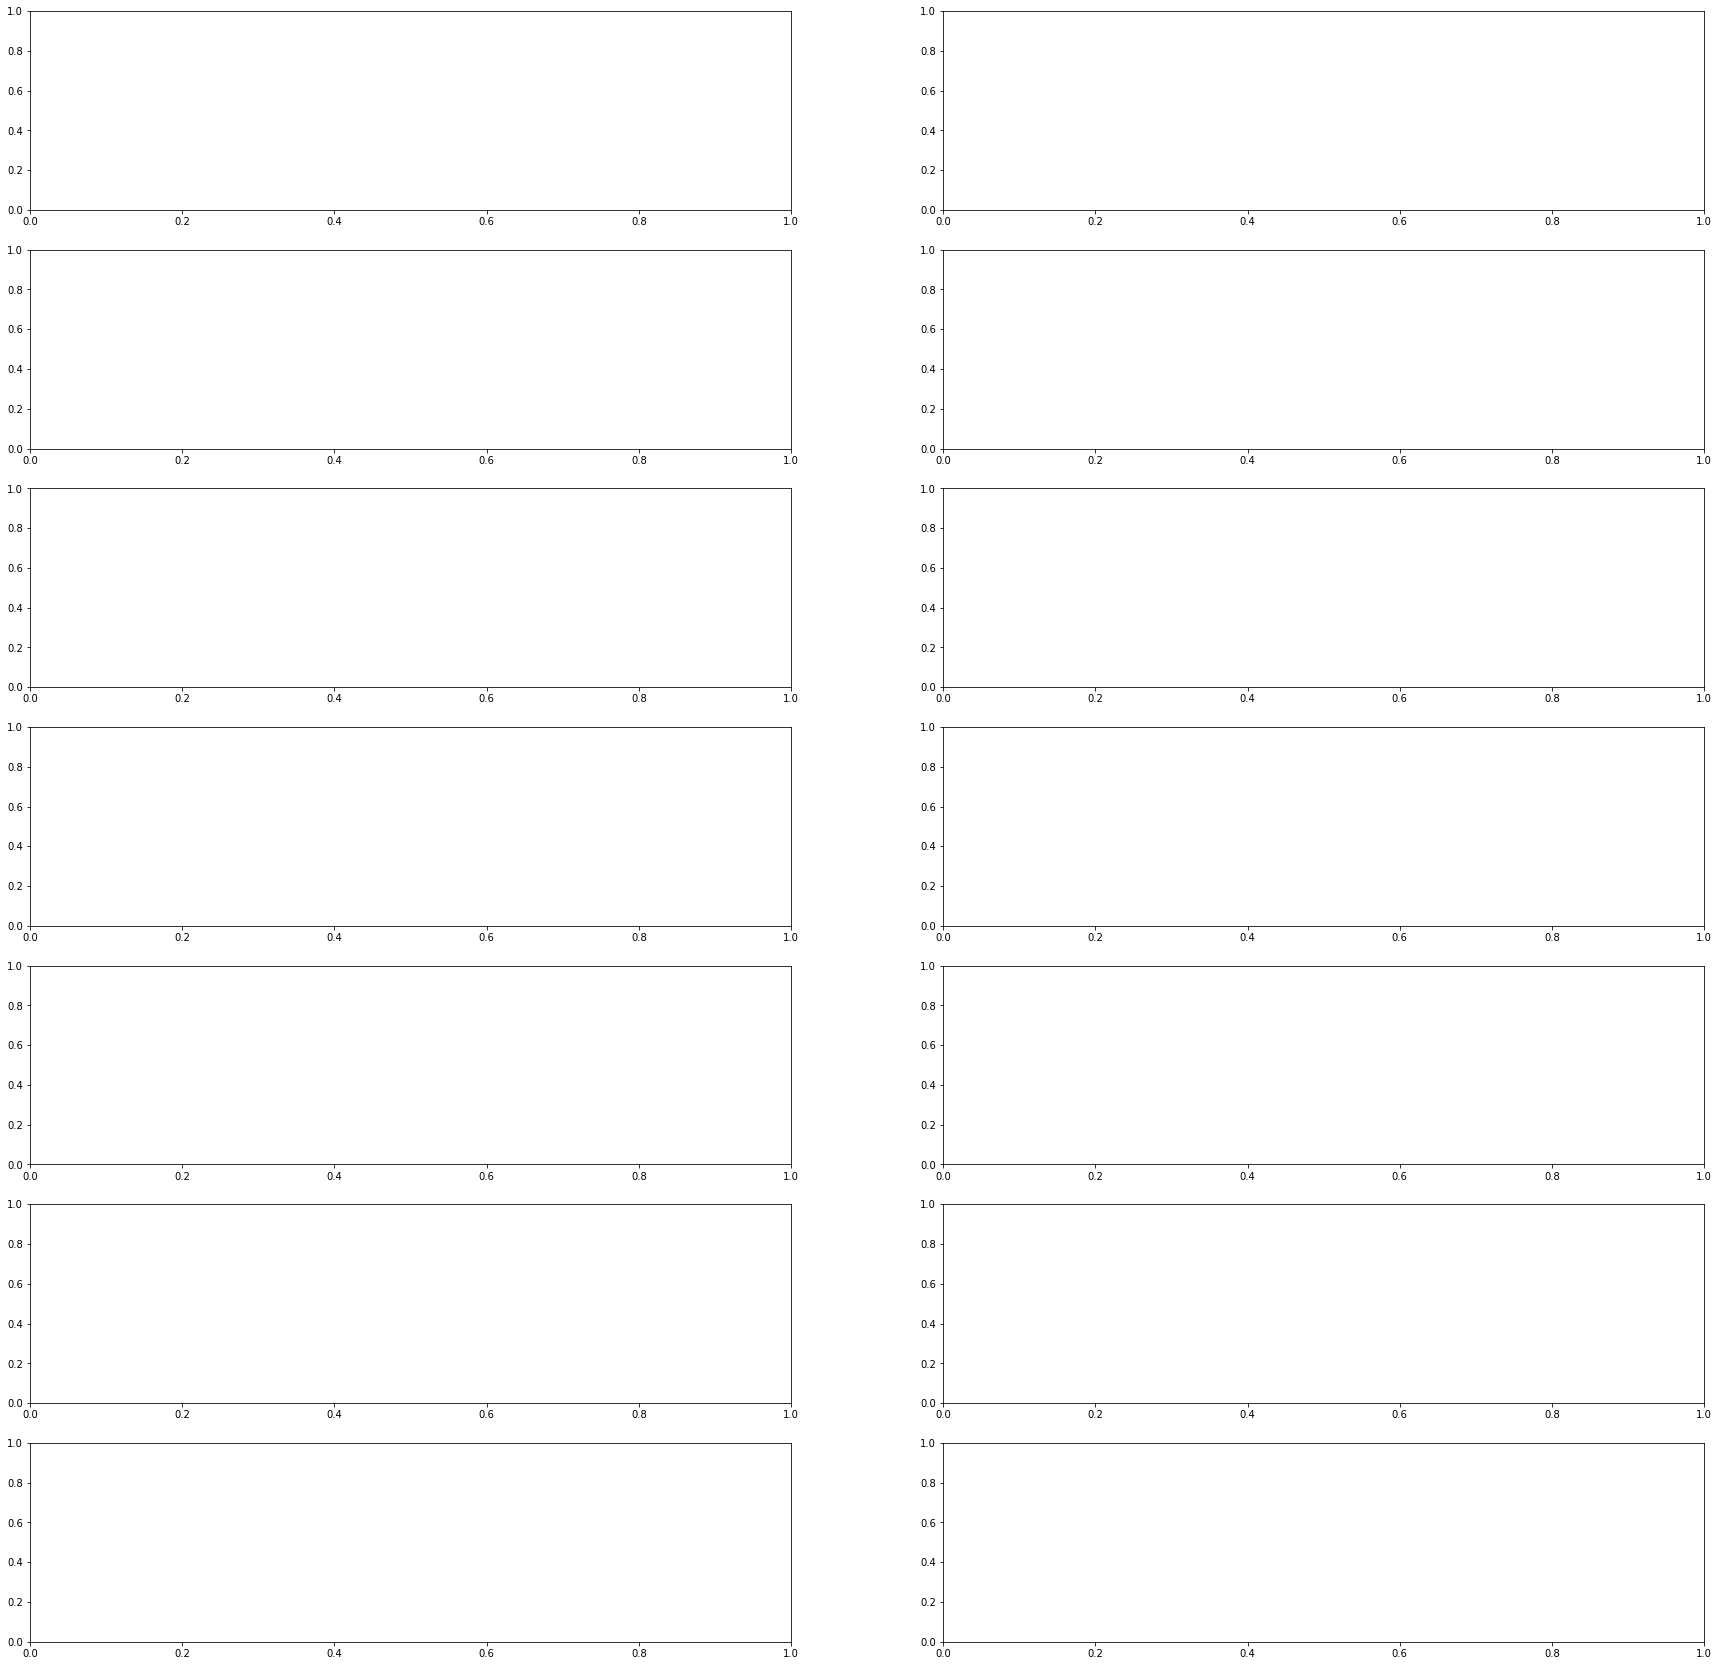

In [162]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
months = df.Date.dt.strftime('%B')
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(months).agg('count').plot(kind='bar', ax=ax, title=crime)
plt.show()

### Hourly

AttributeError: 'numpy.ndarray' object has no attribute 'Date'

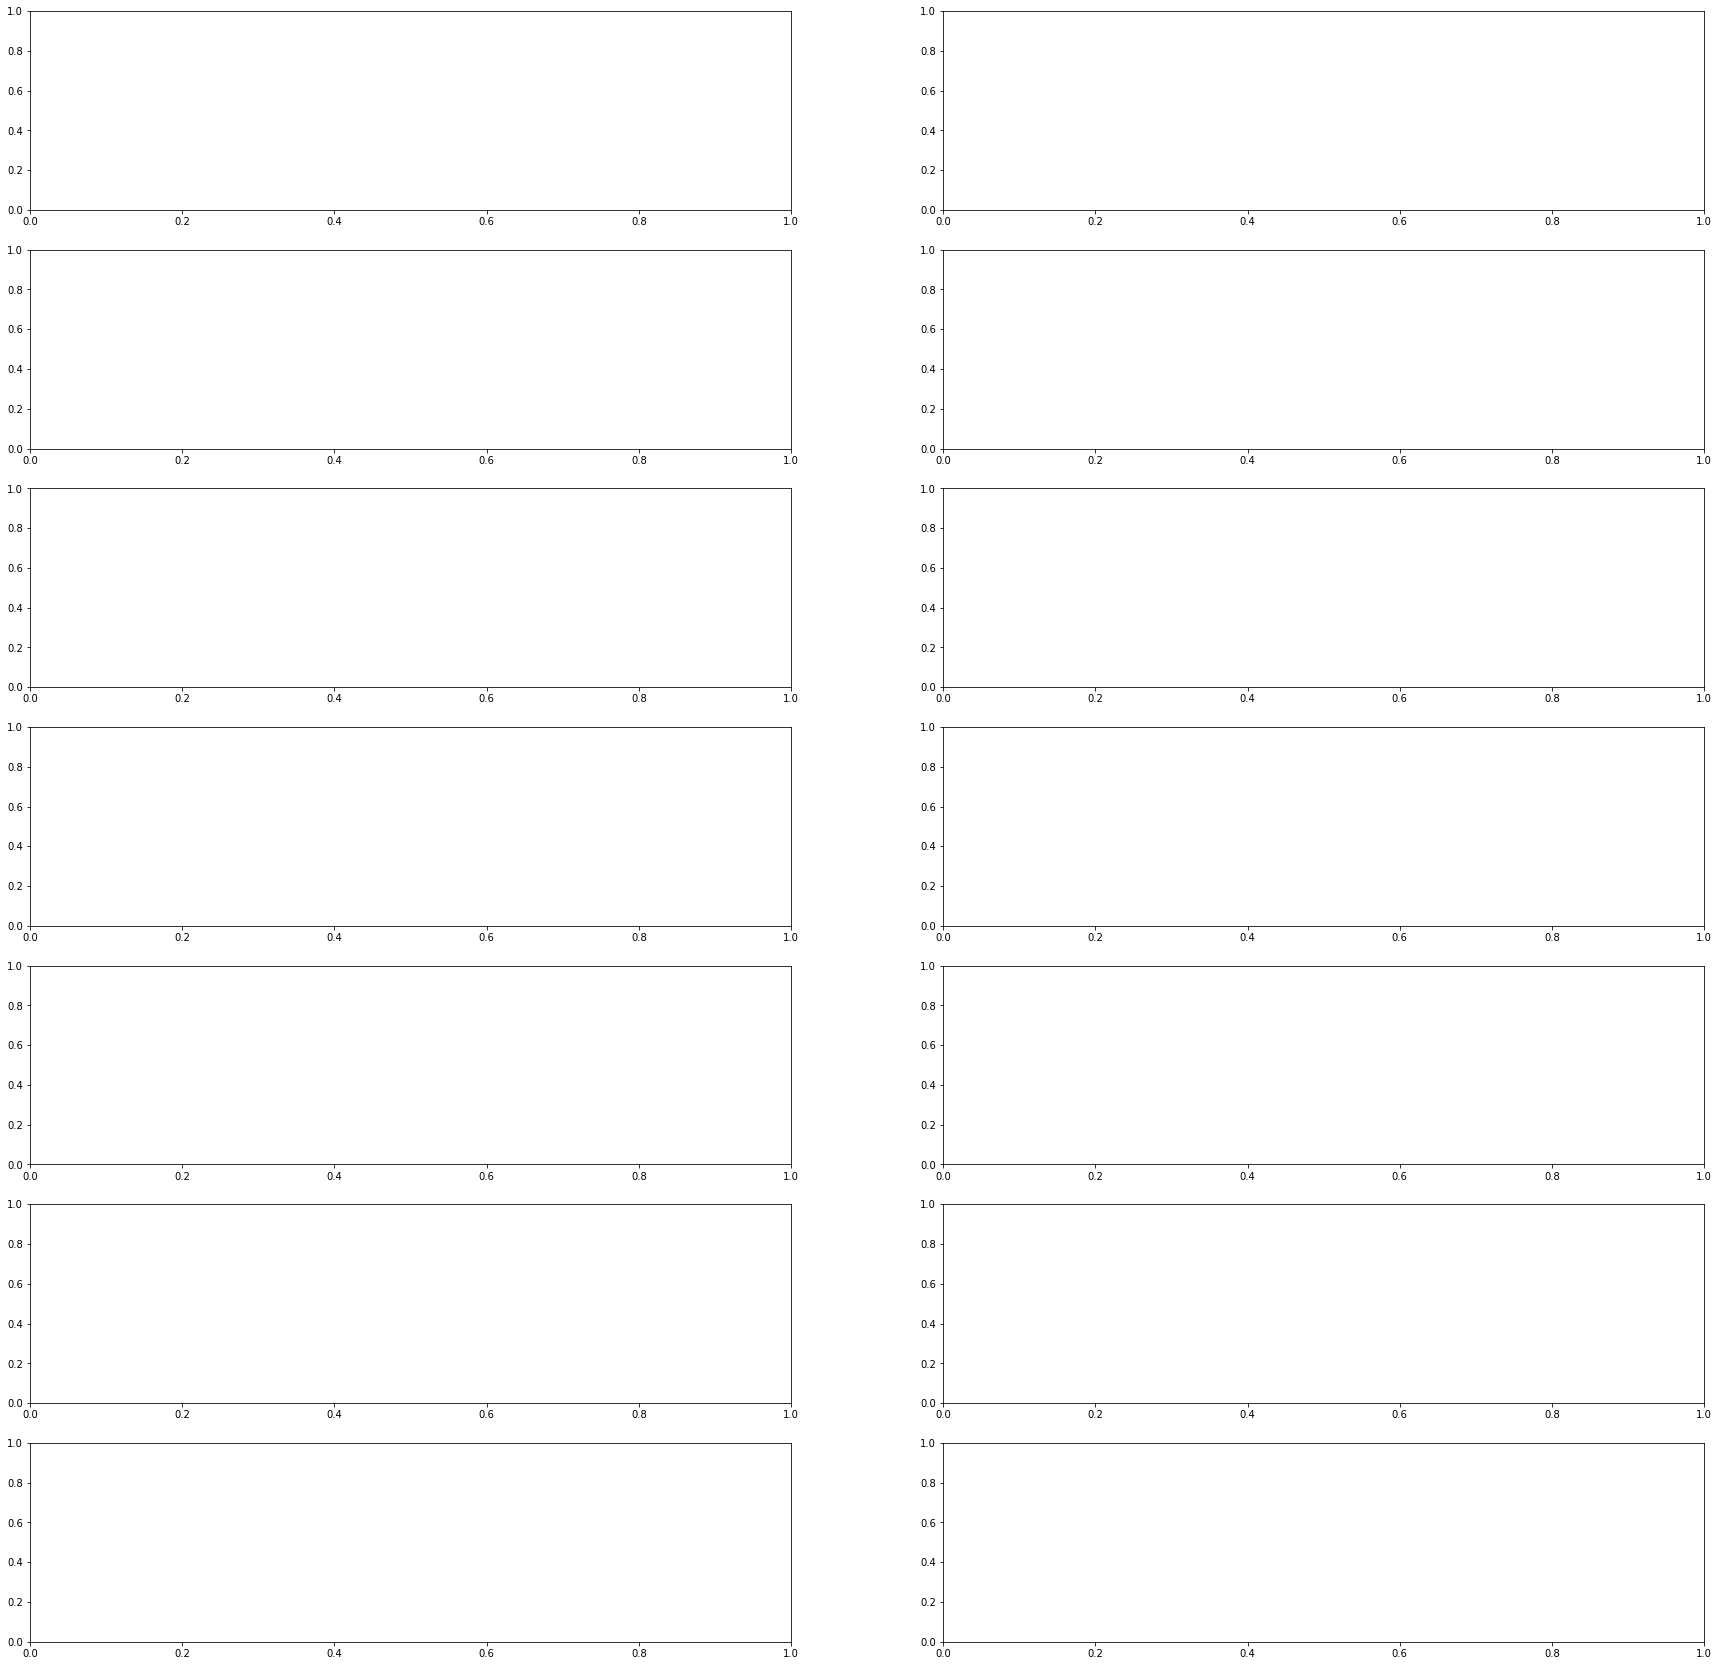

In [161]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
hours = df.Date.dt.strftime('%H')
#for ax, crime in zip(axes.flat, focuscrimes):
#    df['Date'].loc[(df['Category']==crime)].groupby(hours).agg('count').plot(kind='bar', ax=ax, title=crime)
print(hours)
plt.show()

### Hour of the week

TypeError: cannot convert the series to <class 'int'>

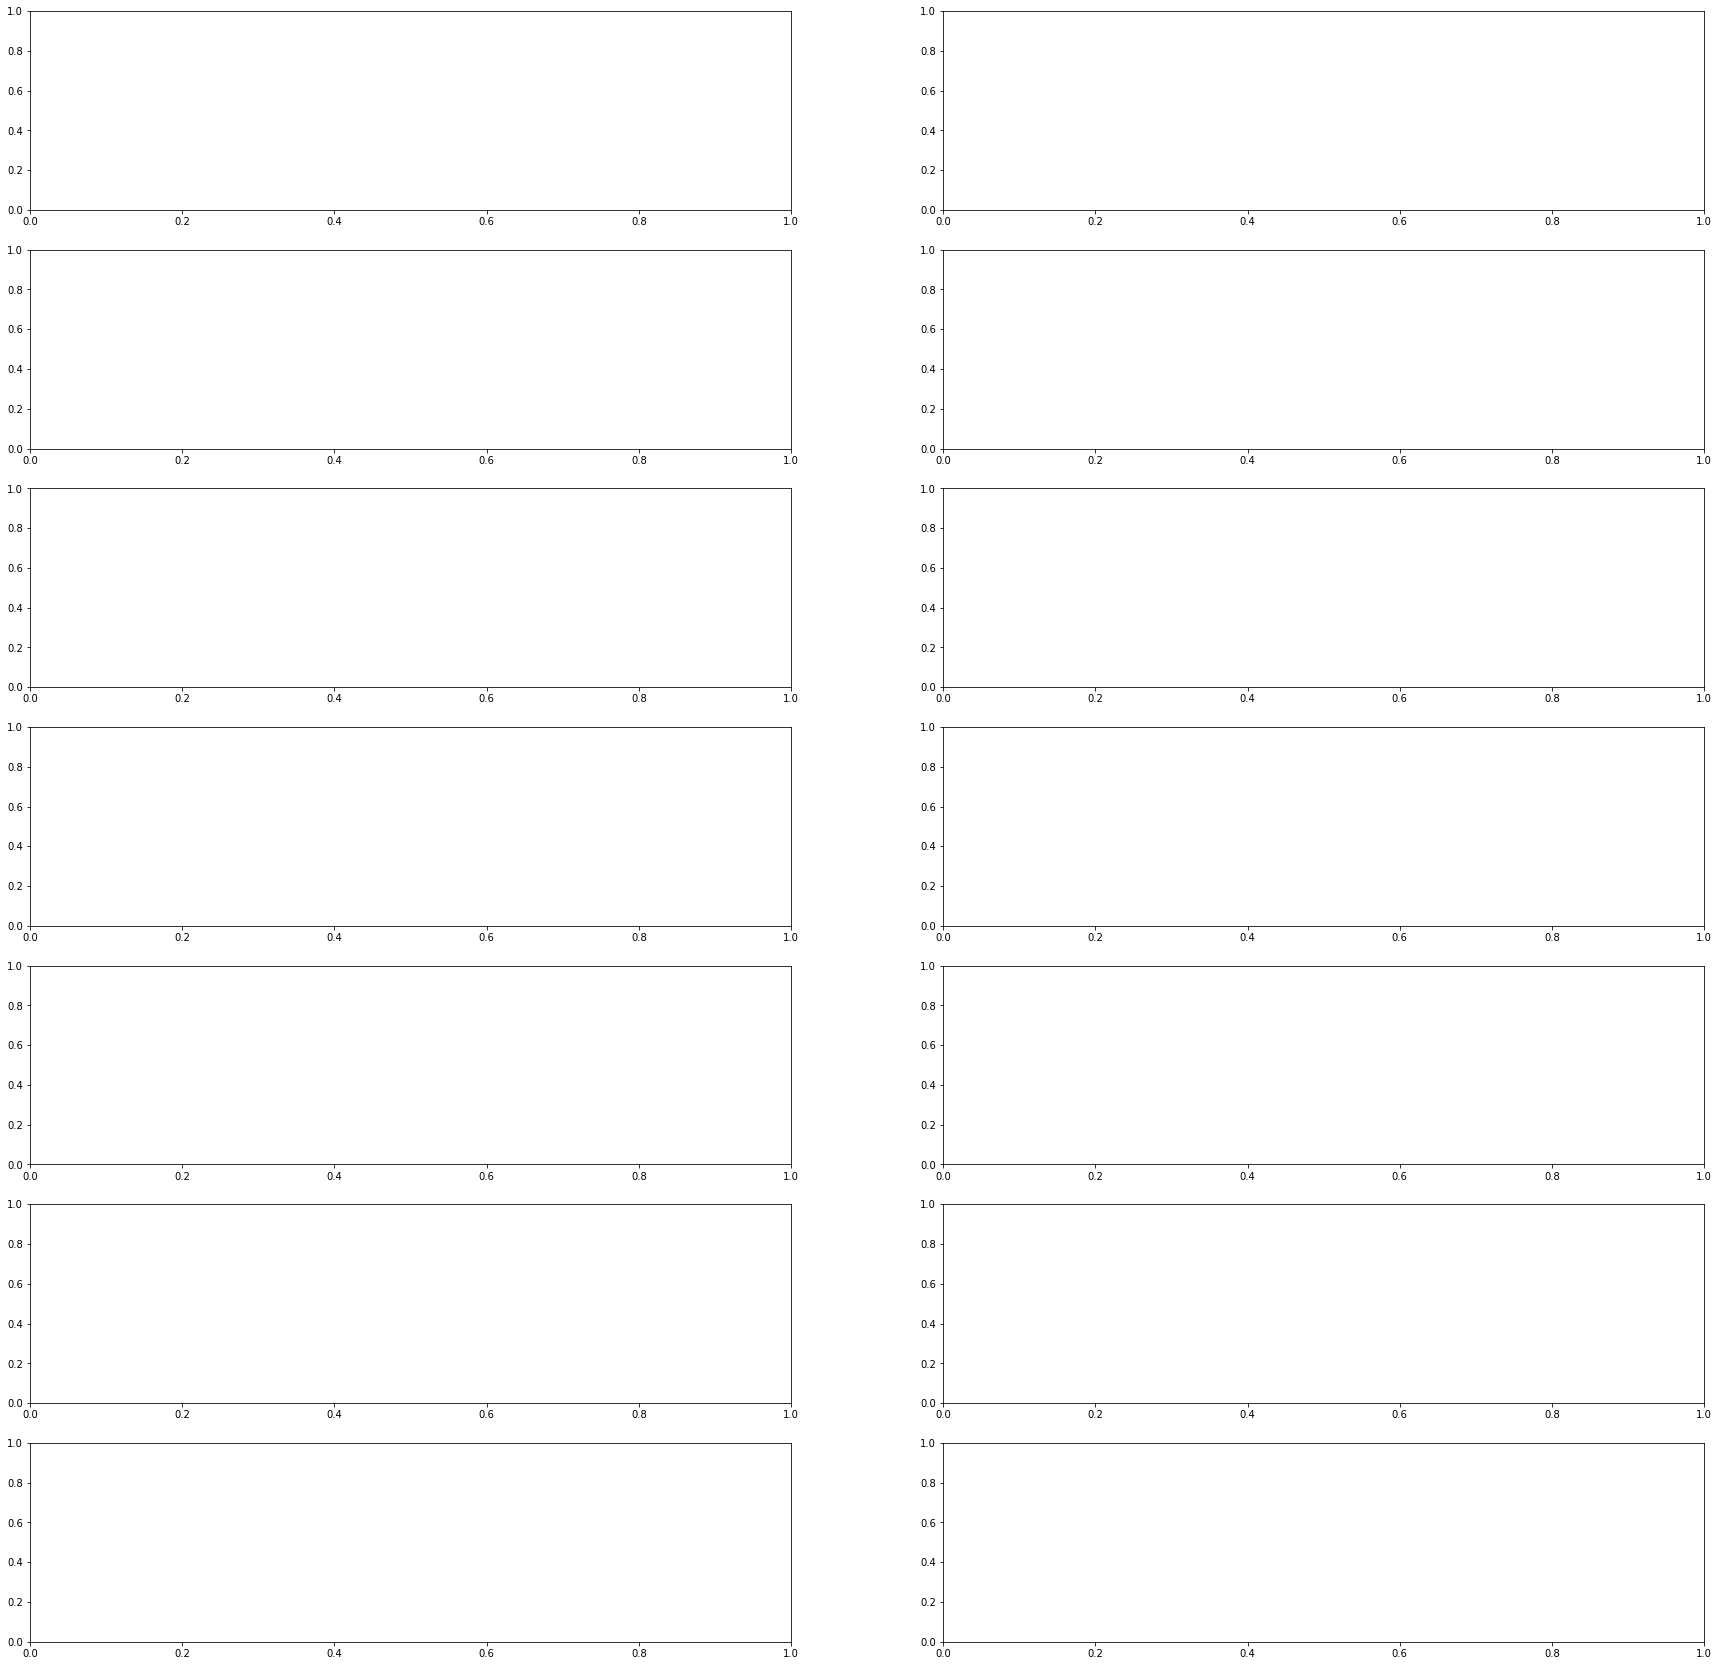

In [73]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
hours_of_week = (df.Date.dt.strftime('%w').astype(int)-1)*24+int(df.Date.dt.strftime('%H').astype(int))
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(hours_of_week).agg('count').plot(kind='bar', ax=ax, title=crime)


<Figure size 432x288 with 0 Axes>

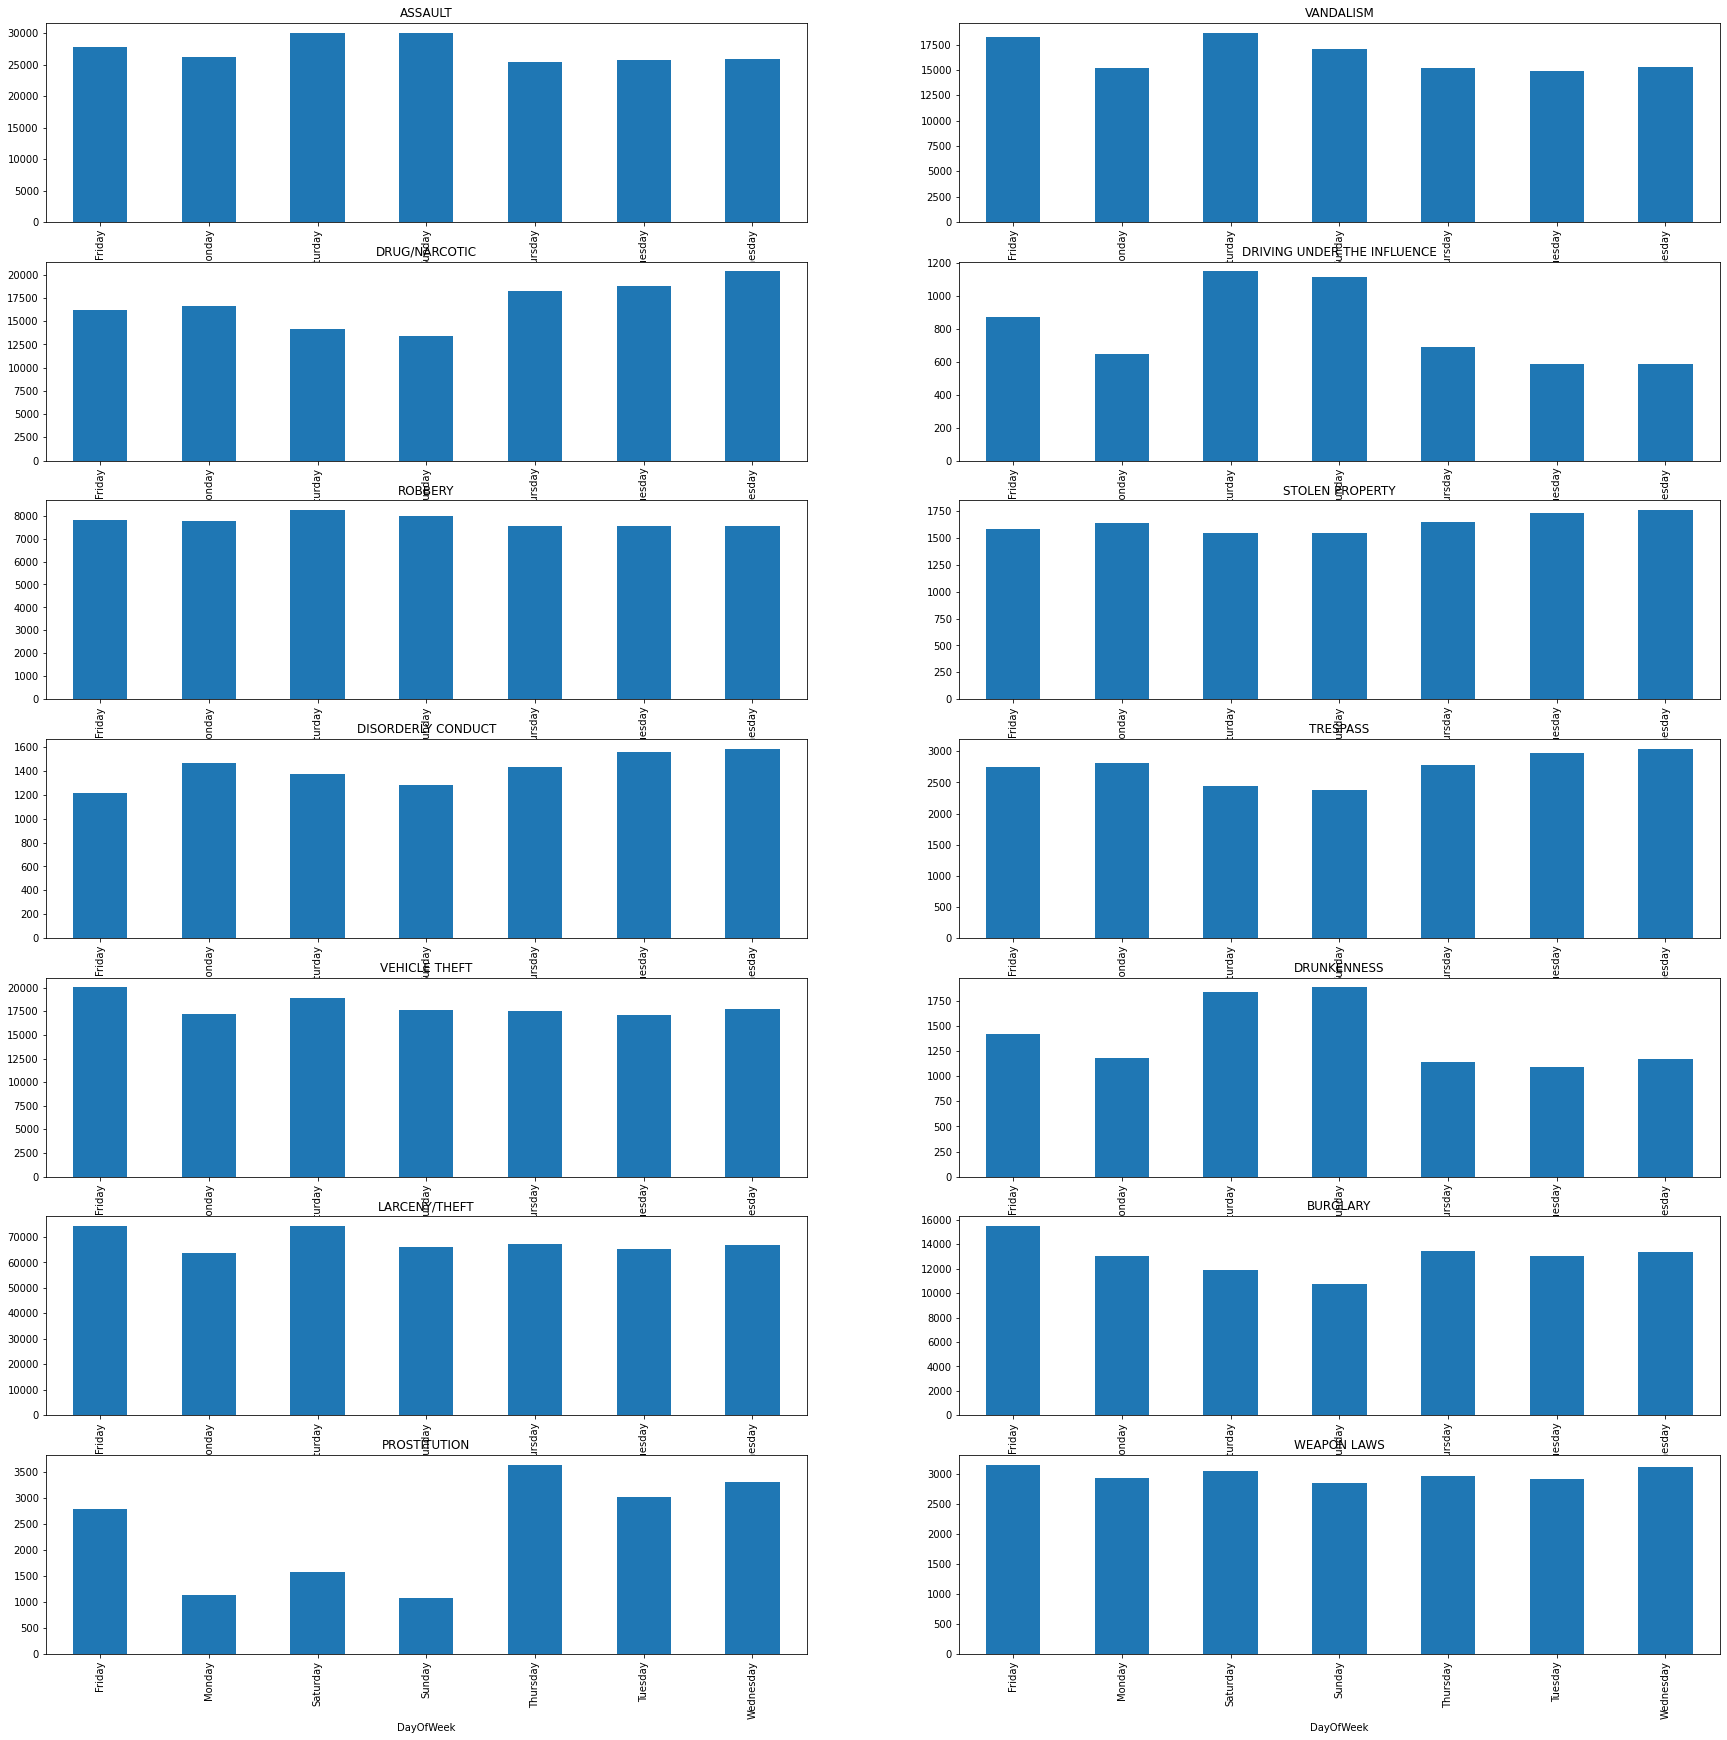

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
hours_of_week = (int(df.Date.dt.strftime('%w'))-1)*24+int(df.Date.dt.strftime('%H')
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(hours_of_week).agg('count').plot(kind='bar', ax=ax, title=crime)


### Monthly

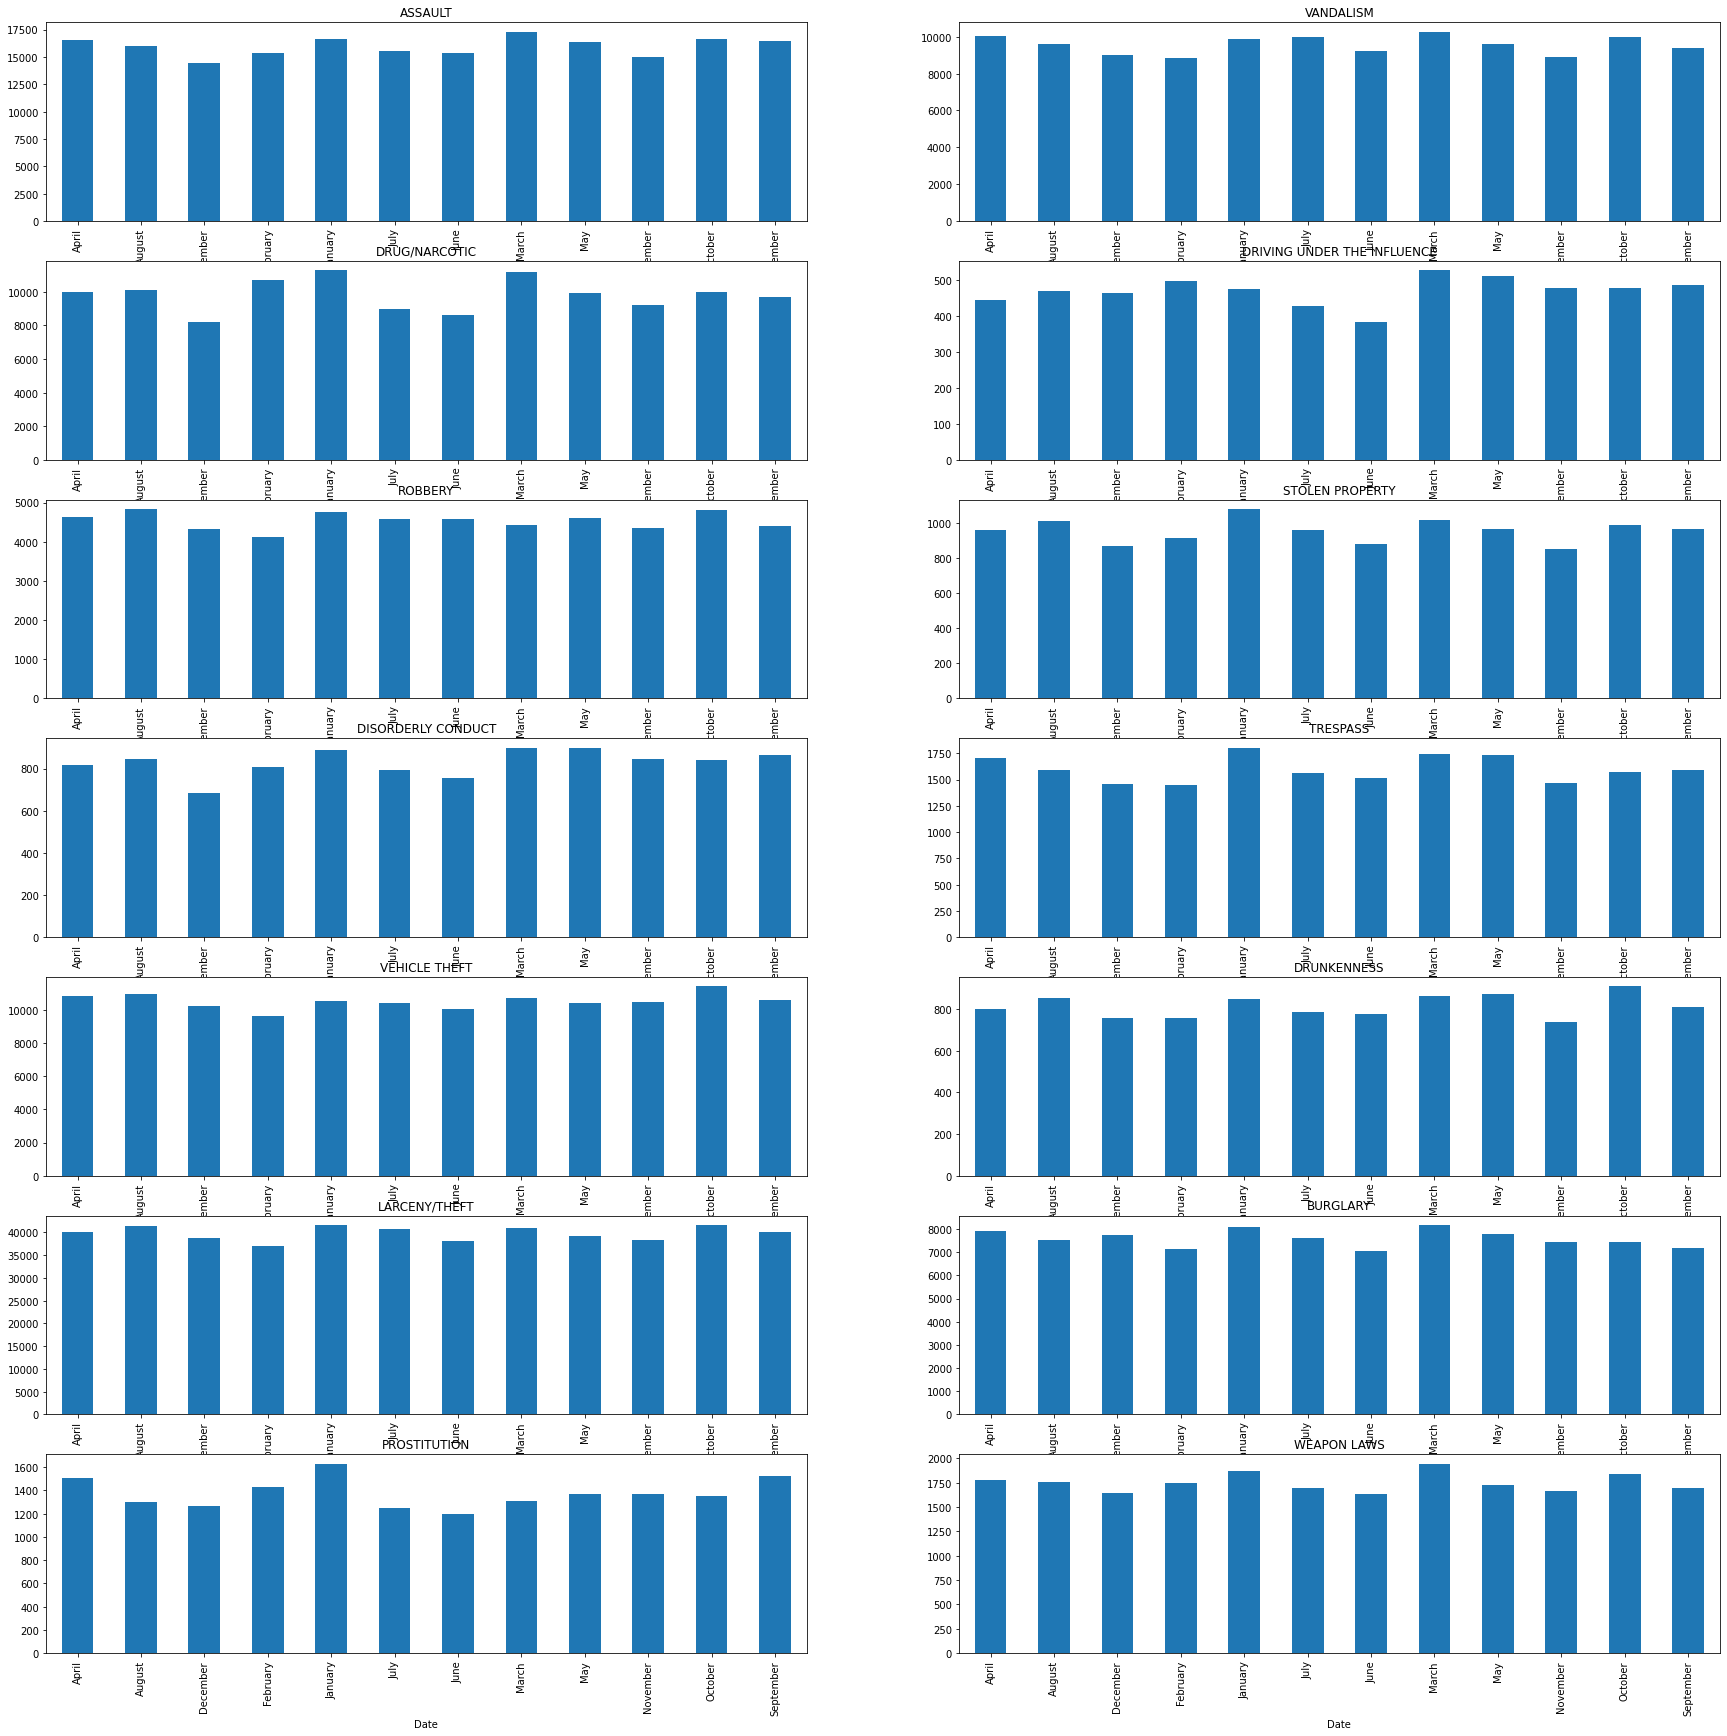

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
months = df.Date.dt.strftime('%B')
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(months).agg('count').plot(kind='bar', ax=ax, title=crime)
plt.show()

### Hourly

0          02
1          09
2          19
3          22
4          21
           ..
2160948    16
2160949    18
2160950    19
2160951    14
2160952    05
Name: Time, Length: 2160953, dtype: object


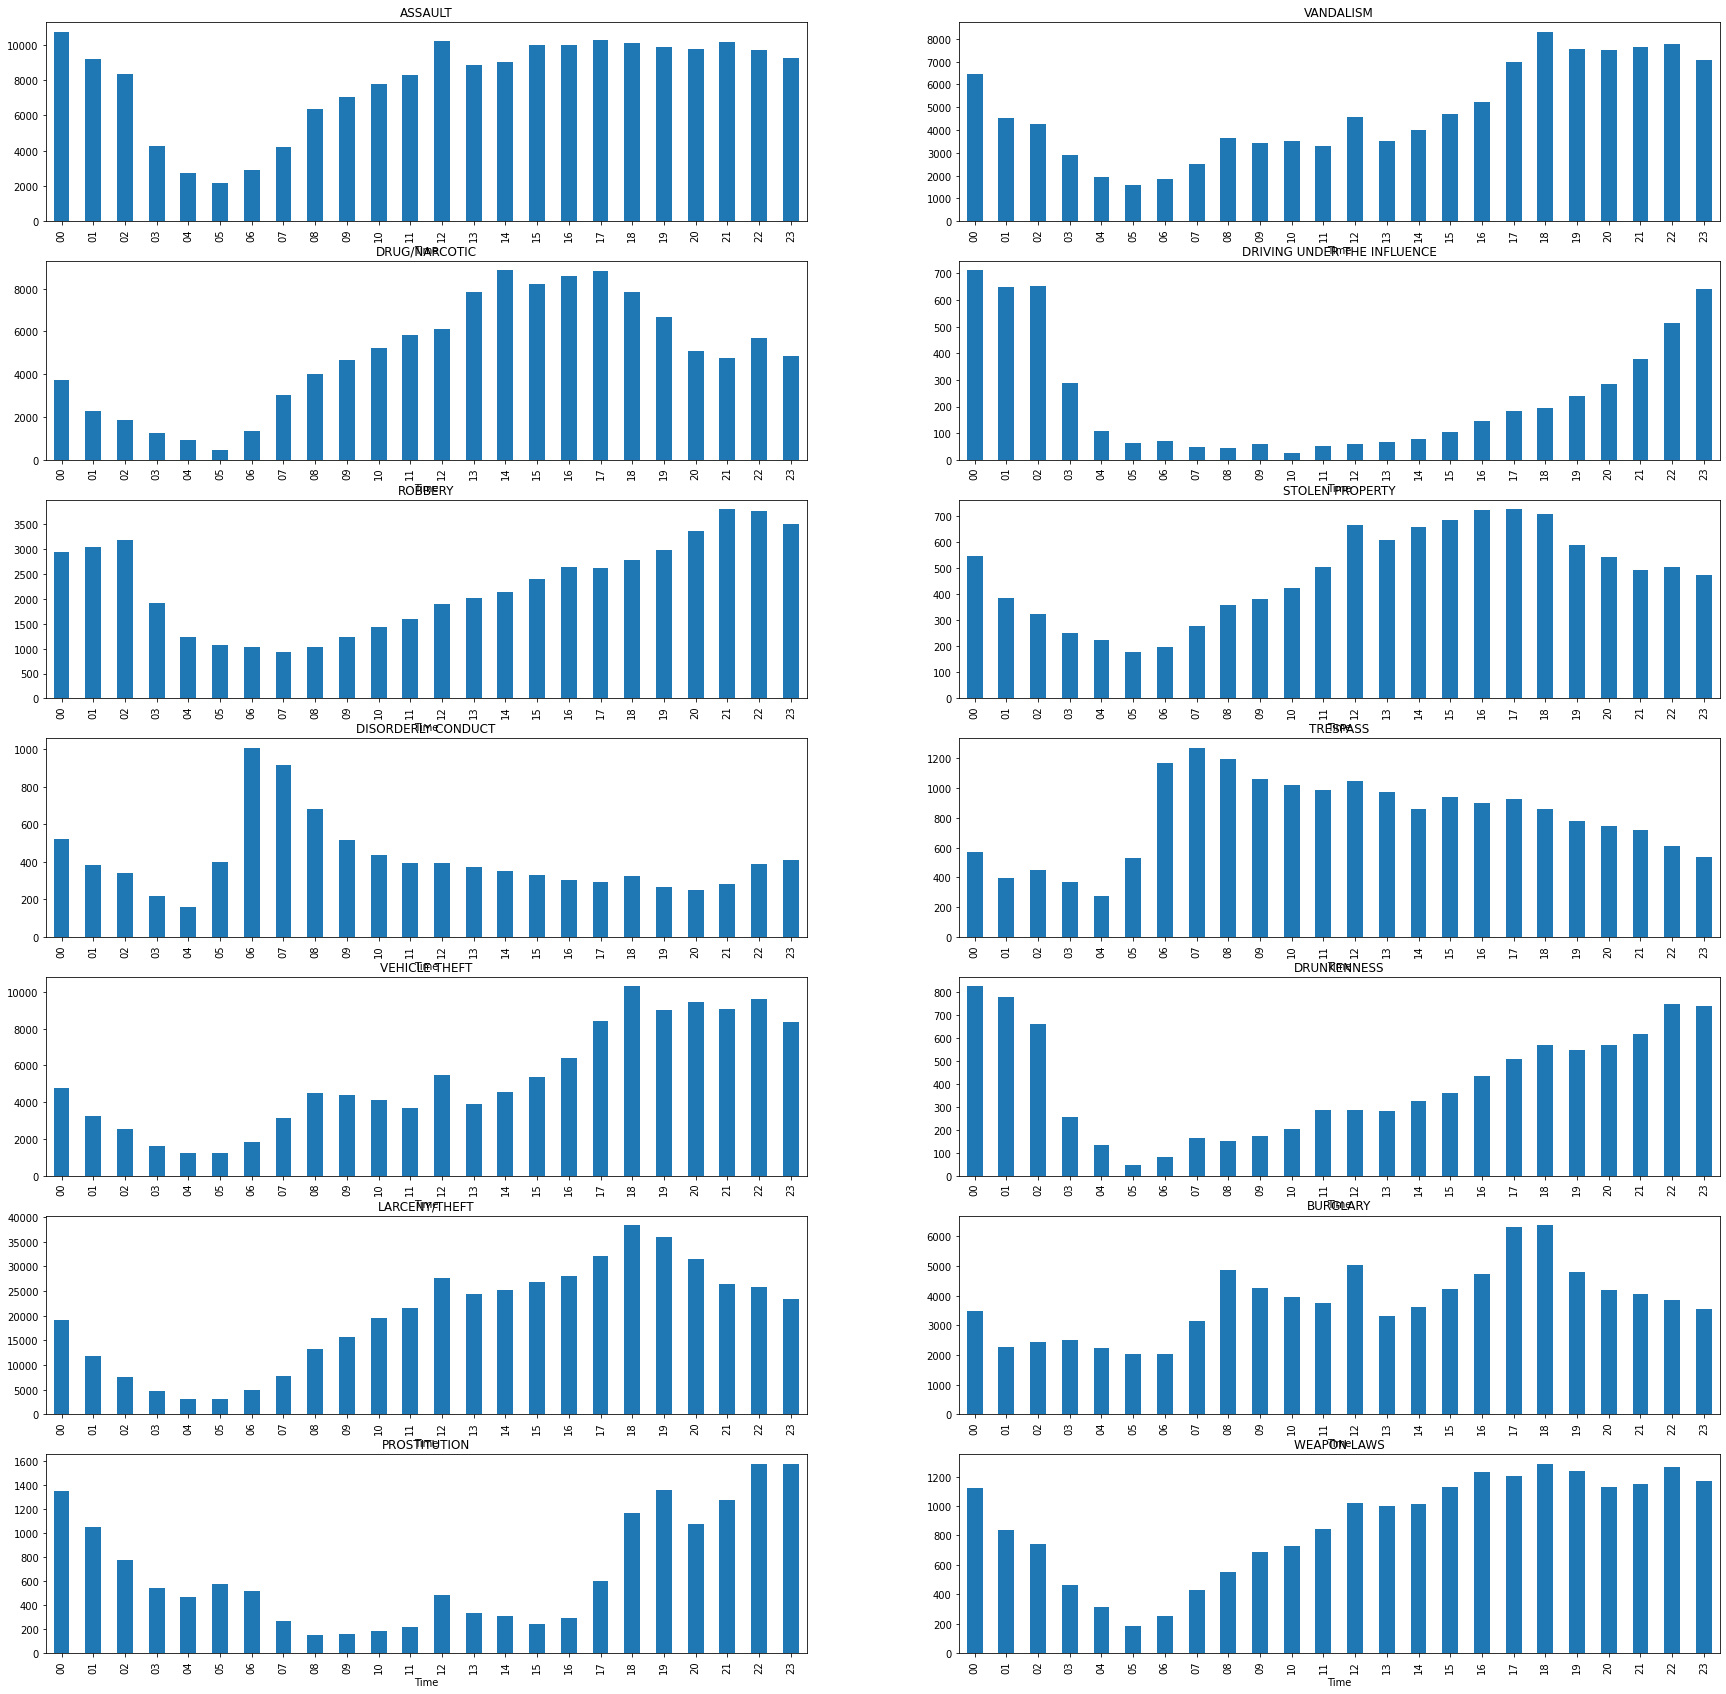

In [77]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
df['Time'] = pd.to_datetime(df['Time'])
hours = df.Time.dt.strftime('%H')
for ax, crime in zip(axes.flat, focuscrimes):
    df['Time'].loc[(df['Category']==crime)].groupby(hours).agg('count').plot(kind='bar', ax=ax, title=crime)
#print(hours)
plt.show()

### Hour of the week

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30))
hours_of_week = (df.Date.dt.strftime('%w').astype(int)-1)*24+df.Time.dt.strftime('%H').astype(int)
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(hours_of_week).agg('count').plot(kind='bar', ax=ax, title=crime)


## Crime in general

In [89]:
districts = df.PdDistrict.unique()
districts

array(['SOUTHERN', 'MISSION', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND',
       'TARAVAL', 'TENDERLOIN', 'NORTHERN', 'CENTRAL', nan], dtype=object)

<AxesSubplot:xlabel='Category'>

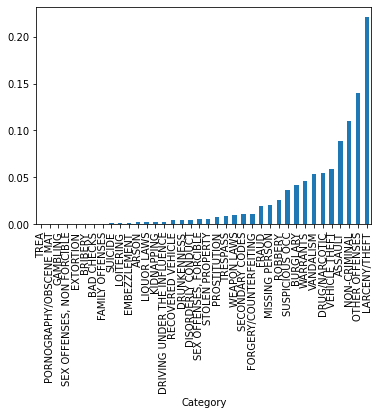

In [106]:
size = len(df)
crime_prevalence = (df.Category.groupby(df.Category).agg('count')/size)

crime_prevalence.sort_values().plot(kind="bar")

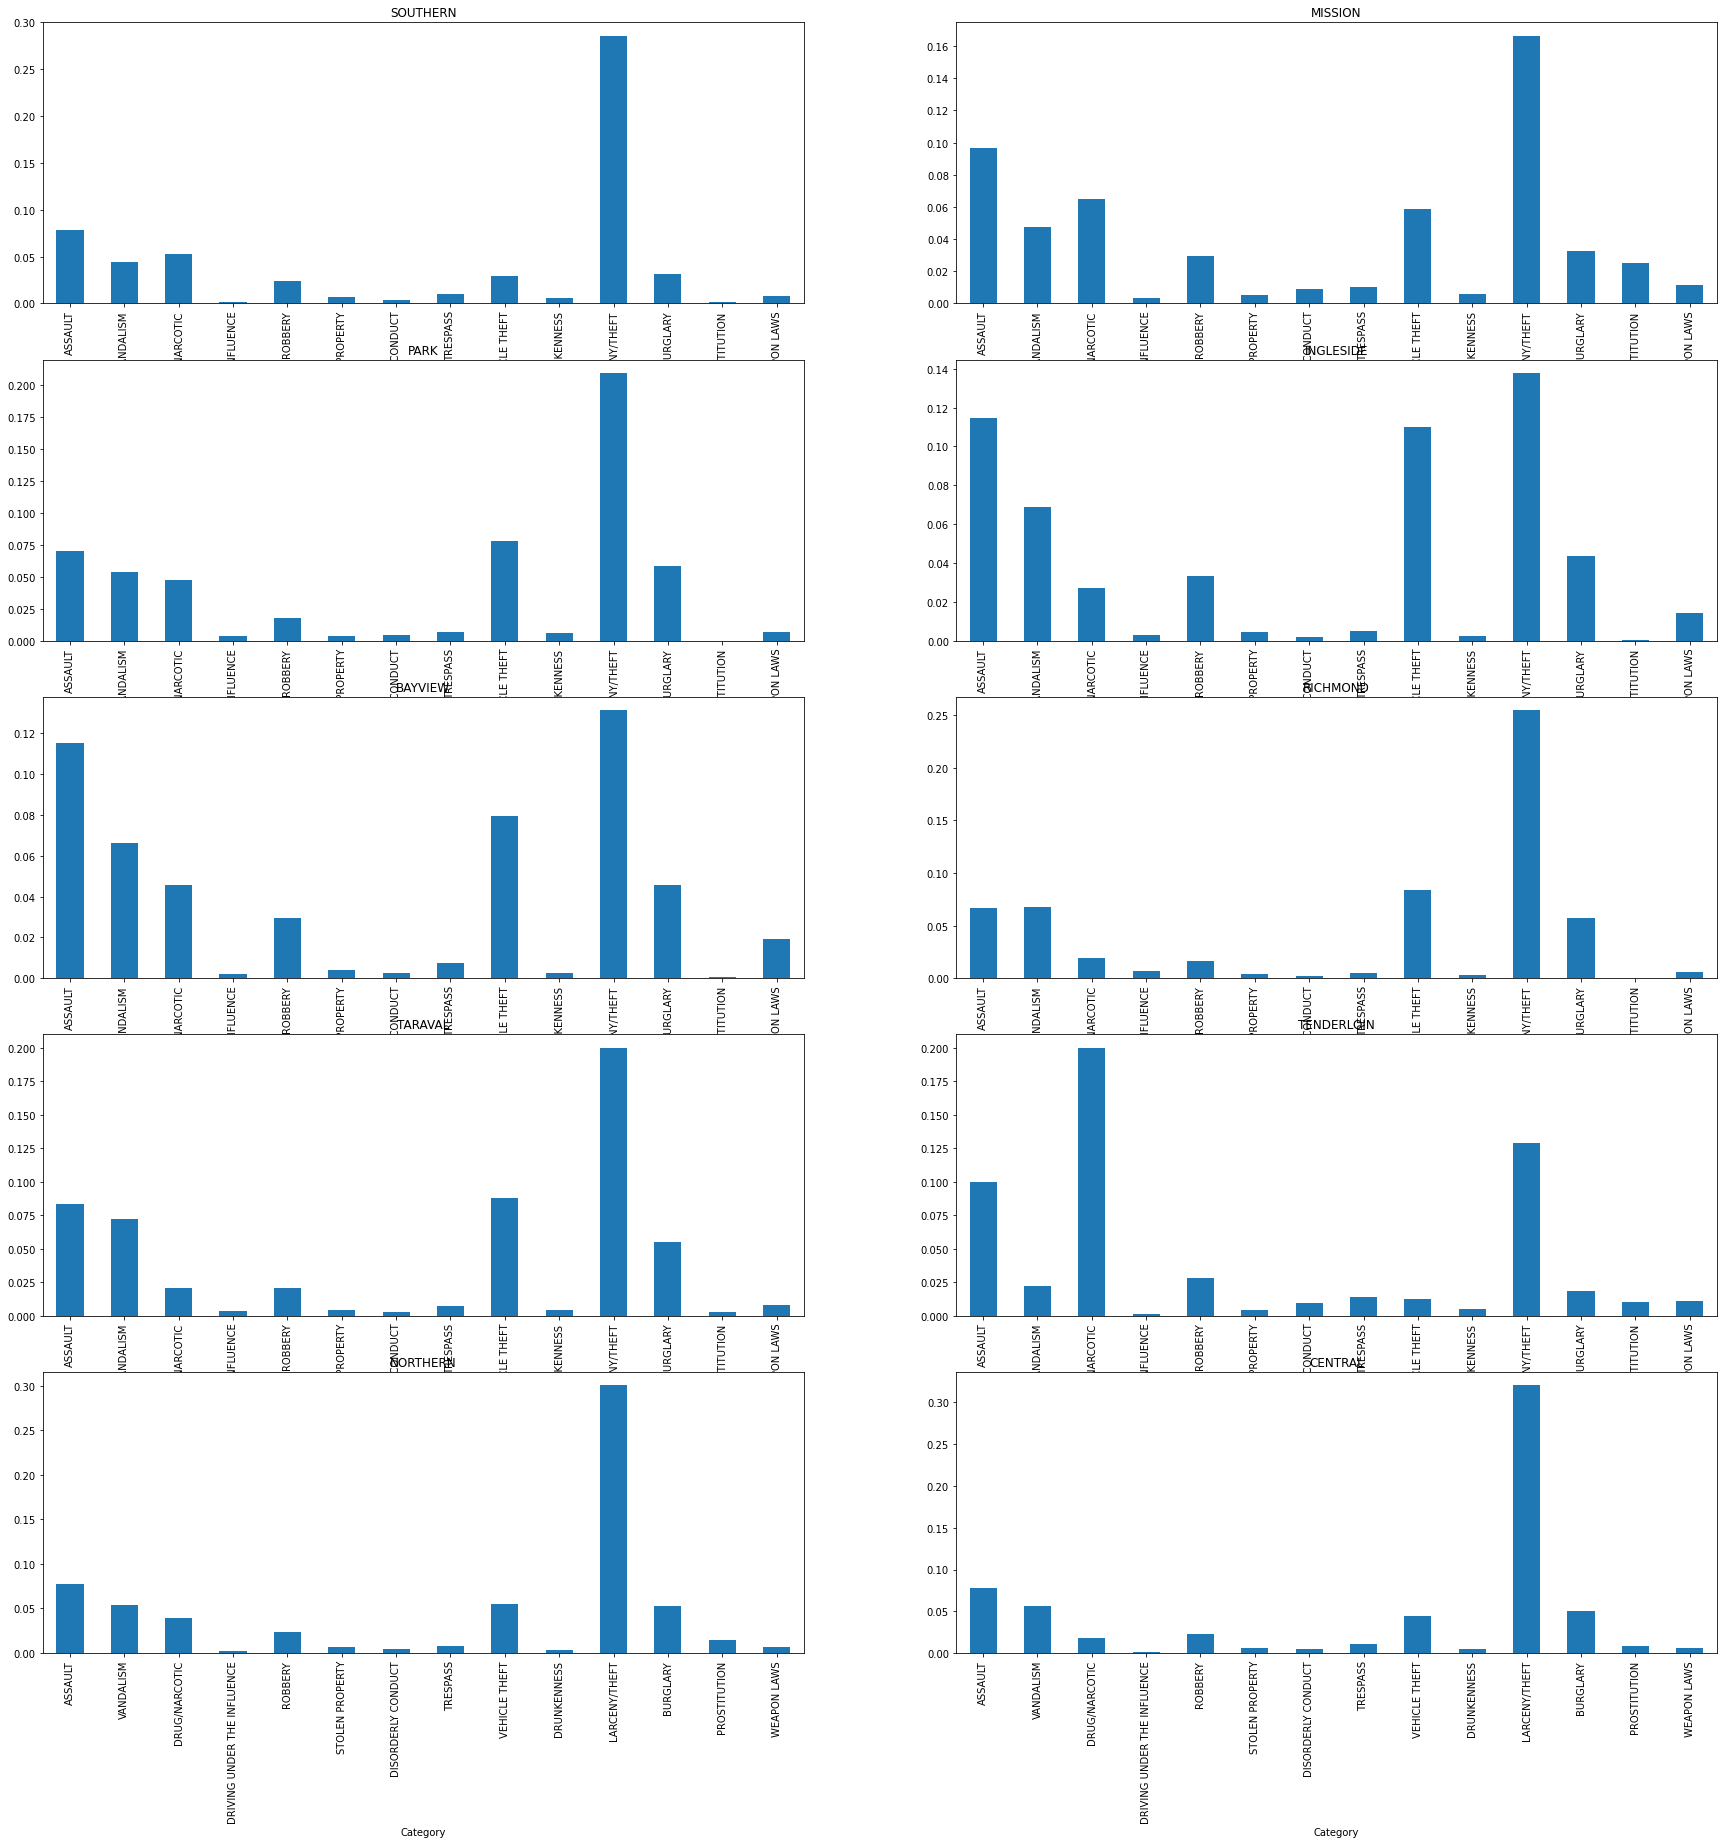

In [143]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(30,30), sharex=True)
results = {}

for ax, district in zip(axes.flat, districts):
    crimes = df.loc[df.PdDistrict == district].Category.groupby(df.Category).agg('count')/len(df.loc[df.PdDistrict==district])
    results[district] = crimes
    crimes.loc[focuscrimes].plot(ax=ax, title=district, kind='bar')


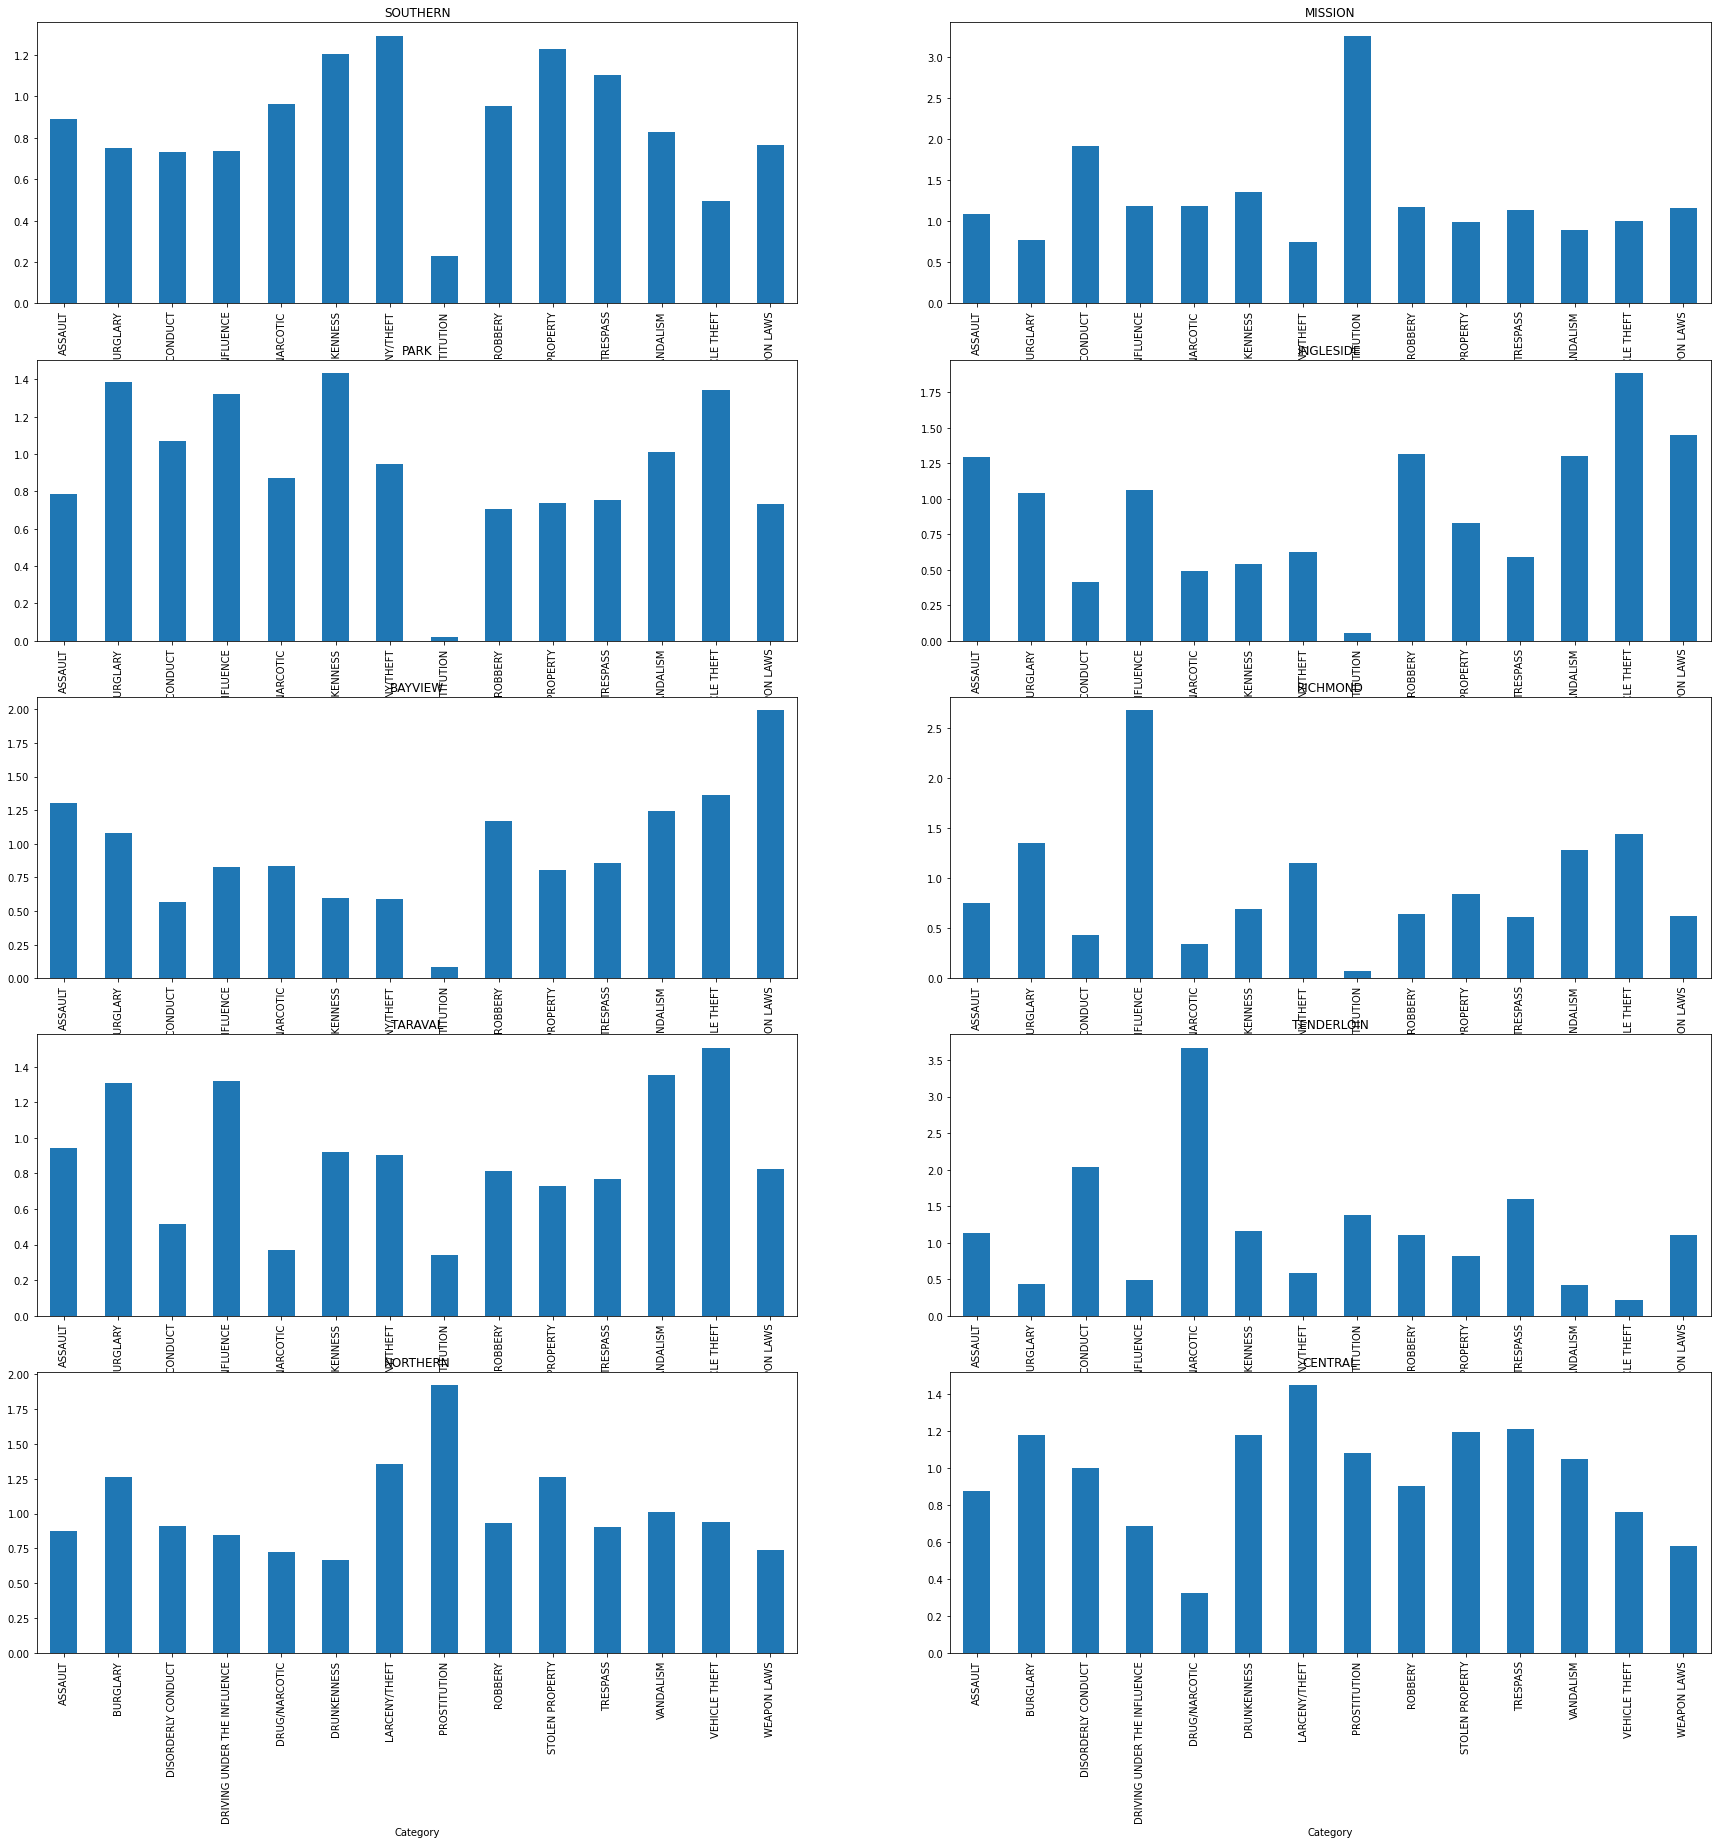

In [155]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(30,30), sharex=True)
for ax, (key, value) in zip(axes.flat, results.items()):
    (value/crime_prevalence).loc[focuscrimes].sort_index().plot(ax=ax, title=key, kind="bar")

In [23]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

shp_path = "destination_data.shp"
sf = shp.Reader(shp_path)

In [24]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [25]:
df = read_shapefile(sf)
df.shape

(10, 4)

In [26]:
df.head()

,OBJECTID,DISTRICT,COMPANY,coords
0,1,CENTRAL,A,"[(-122.40532134644249, 37.806867516866724), (-..."
1,2,SOUTHERN,B,"[(-122.38821894111335, 37.78999576746098), (-1..."
2,3,BAYVIEW,C,"[(-122.39341605532405, 37.708411637816816), (-..."
3,4,MISSION,D,"[(-122.40801677575325, 37.76940485786585), (-1..."
4,5,PARK,F,"[(-122.44665042193688, 37.77587626927481), (-1..."


In [20]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [27]:
df.keys()

Index(['OBJECTID', 'DISTRICT', 'COMPANY', 'coords'], dtype='object')

## Plot shape

(-122.41378829382472, 37.80472203449138)

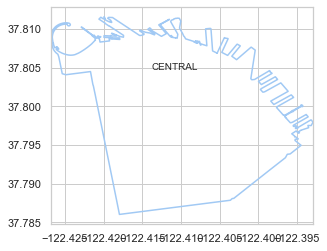

In [32]:
district = 'CENTRAL'
com_id = df[df.DISTRICT == district].index[0]
plot_shape(com_id, district)

In [33]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map withlim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

## Plot Map
### Picture 1

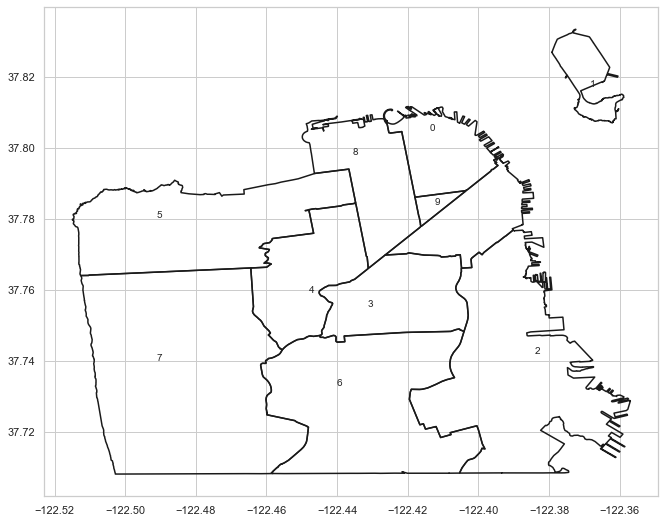

In [34]:
plot_map(sf)

In [35]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [36]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [37]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

### Picture 2

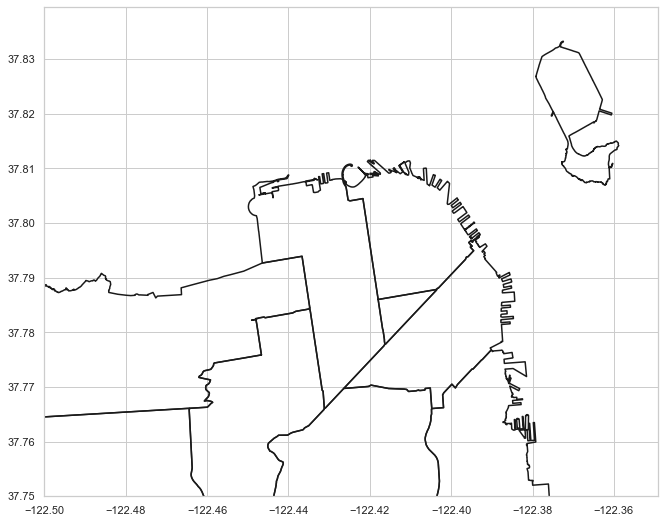

In [51]:
plot_map(sf, -122.50, 37.75)

### Picture 3

<Figure size 792x648 with 0 Axes>

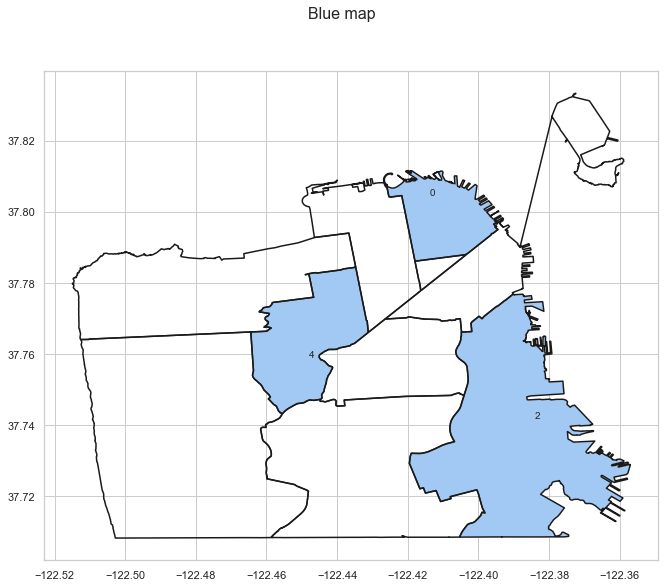

In [52]:
ids = [0, 2, 4]

plot_map_fill_multiples_ids("Blue map", ids, sf, color='b')

### Picture 5

<Figure size 792x648 with 0 Axes>

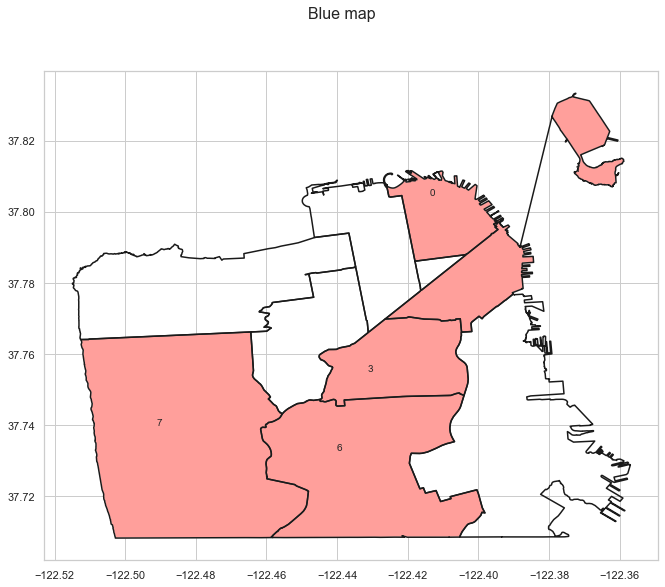

In [61]:
ids_red = [6, 7, 3, 0, 1]

plot_map_fill_multiples_ids("Red map", ids_red, sf, color='r')

### Picture 6

<Figure size 792x648 with 0 Axes>

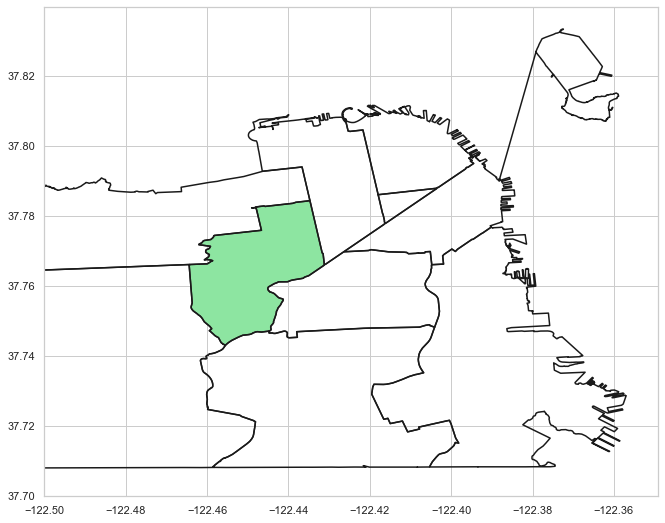

In [65]:
plot_map_fill(4, sf, x_lim = -122.5, 
                          y_lim = 37.70, 
                          color = 'g')

# Where to park?

In [78]:
vehicle_thefts_on_sunday = crime_df.loc[(crime_df.DayOfWeek == "Sunday") & (crime_df.Category == "VEHICLE THEFT")]
thefts_by_district = vehicle_thefts_on_sunday.PdDistrict.groupby(crime_df.PdDistrict).agg('count')
thefts_by_district.values

array([2322, 1506, 2846, 2400, 2001, 1328, 1366, 1566, 1943,  356],
      dtype=int64)

In [81]:
def plot_map_values(sf, x_lim = None, y_lim = None, values = [], figsize = (11,9)):
    '''
    Plot map withlim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, values[id], fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

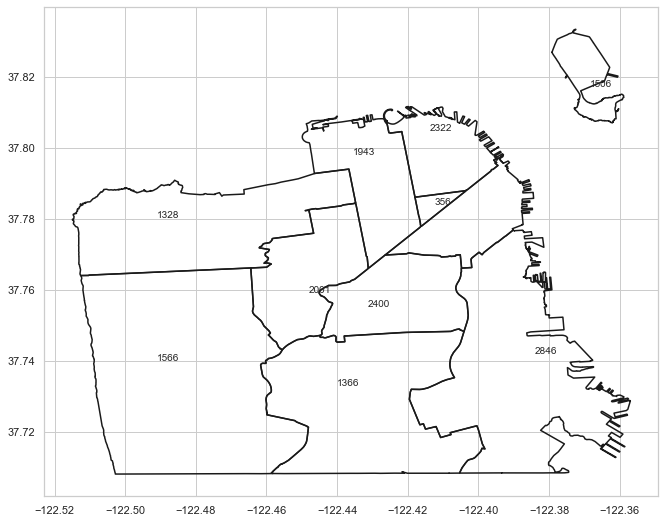

In [82]:
plot_map_values(sf, values=thefts_by_district.values)